In [13]:
%matplotlib inline
import sys
sys.path.append('../../trajectron')
import os
import numpy as np
import torch
import dill
import json
import pathlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as pe
from helper import *
import visualization

In [2]:
print(sys.path)

['/zhitai/Trajectron-plus-plus/experiments/nuScenes', '/home/mingg/miniconda3/envs/torch1/lib/python39.zip', '/home/mingg/miniconda3/envs/torch1/lib/python3.9', '/home/mingg/miniconda3/envs/torch1/lib/python3.9/lib-dynload', '', '/home/mingg/miniconda3/envs/torch1/lib/python3.9/site-packages', '../../trajectron']


## Load nuScenes SDK and data

In [3]:
nuScenes_data_path = '/zhitai/nuScenes_mini' # Data Path to nuScenes data set 
nuScenes_devkit_path = './devkit/python-sdk/'
sys.path.append(nuScenes_devkit_path)
from nuscenes.map_expansion.map_api import NuScenesMap
nusc_map = NuScenesMap(dataroot=nuScenes_data_path, map_name='boston-seaport')

In [4]:
line_colors = ['#375397','#80CBE5','#ABCB51','#F05F78', '#C8B0B0']

# Map Encoding Demo

In [5]:
with open('../processed/nuScenes_test_full.pkl', 'rb') as f:
    eval_env = dill.load(f, encoding='latin1')
eval_scenes = eval_env.scenes

In [6]:
ph = 6
log_dir = './models'

In [8]:
scene = eval_scenes[25]
scene.name

'105'

In [9]:
# Define ROI in nuScenes Map
x_min = 773.0
x_max = 1100.0
y_min = 1231.0
y_max = 1510.0

In [10]:
layers = ['drivable_area',
          'road_segment',
          'lane',
          'ped_crossing',
          'walkway',
          'stop_line',
          'road_divider',
          'lane_divider']

## Prediction including Map Encoding


Loading from ./models/models_19_Aug_2023_01_02_30_int_ee_me/model_registrar-20.pt
Loaded!




Loading from ./models/int_ee_me/model_registrar-12.pt
Loaded!



/home/mingg/miniconda3/envs/torch1/lib/python3.9/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleDict' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/mingg/miniconda3/envs/torch1/lib/python3.9/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.rnn.LSTM' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/mingg/miniconda3/envs/torch1/lib/python3.9/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the orig

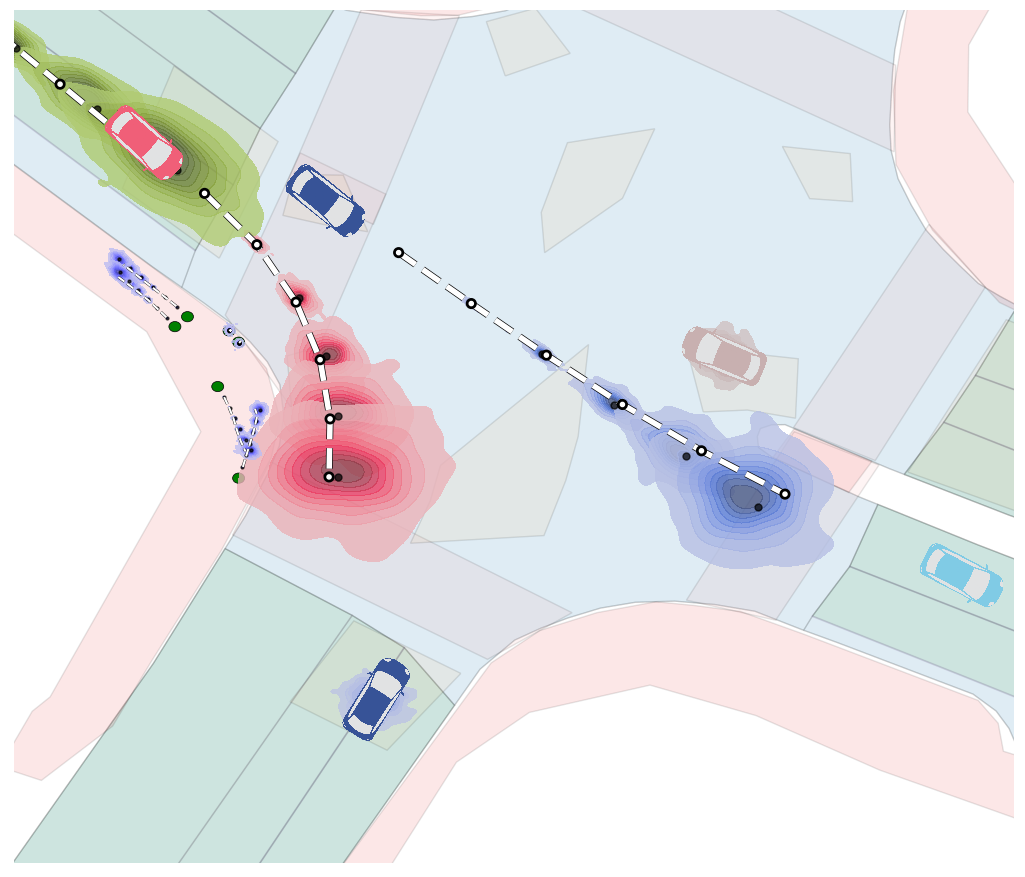

In [28]:
model_dir = os.path.join(log_dir, 'int_ee_me') 
eval_stg, hyp = load_model(model_dir, eval_env, ts=12)
ph = 6
with torch.no_grad():
    timestep = np.array([2])
    predictions = eval_stg.predict(scene,
                                   timestep,
                                   ph,
                                   num_samples=500)

    predictions_mm = eval_stg.predict(scene,
                                      timestep,
                                      ph,
                                      num_samples=1,
                                      z_mode=True,
                                      gmm_mode=True)

    # Plot predicted timestep for random scene in map
    my_patch = (x_min, y_min, x_max, y_max)
    fig, ax = nusc_map.render_map_patch(my_patch, layers, figsize=(10, 10), alpha=0.1, render_egoposes_range=False)

    ax.plot([], [], 'ko-',
            zorder=620,
            markersize=4,
            linewidth=2, alpha=0.7, label='Ours (MM)')

    ax.plot([],
            [],
            'w--o', label='Ground Truth',
            linewidth=3,
            path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])

    plot_vehicle_nice(ax,
                      predictions,
                      scene.dt,
                      max_hl=10,
                      ph=ph,
                      map=None, x_min=x_min, y_min=y_min)

    plot_vehicle_mm(ax,
                    predictions_mm,
                    scene.dt,
                    max_hl=10,
                    ph=ph,
                    map=None, x_min=x_min, y_min=y_min)

    ax.set_ylim((1385, 1435))
    ax.set_xlim((850, 900))
    leg = ax.legend(loc='upper right', fontsize=20, frameon=True)
    ax.axis('off')
    for lh in leg.legendHandles:
        lh.set_alpha(.5)
    ax.get_legend().remove()
    fig.show()

#     sp = pathlib.Path(os.path.join(model_dir, 'plots/qual_nuScenes_map_pos.pdf'))
#     sp.parent.mkdir(exist_ok=True)
#     fig.savefig(sp, dpi=300, bbox_inches='tight')

## Prediction without Map Encoding

In [22]:
model_dir = os.path.join(log_dir, 'int_ee') 
eval_stg_nm, hyp = load_model(model_dir, eval_env, ts=12)


Loading from ./models/int_ee/model_registrar-12.pt
Loaded!



/home/mingg/miniconda3/envs/torch1/lib/python3.9/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleDict' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/mingg/miniconda3/envs/torch1/lib/python3.9/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.rnn.LSTM' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/mingg/miniconda3/envs/torch1/lib/python3.9/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the orig

/home/mingg/miniconda3/envs/torch1/lib/python3.9/site-packages/torch/distributions/distribution.py:44: UserWarning: <class 'model.components.gmm2d.GMM2D'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +
/home/mingg/miniconda3/envs/torch1/lib/python3.9/site-packages/torch/distributions/distribution.py:44: UserWarning: <class 'model.components.gmm2d.GMM2D'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +
/home/mingg/miniconda3/envs/torch1/lib/python3.9/site-packages/torch/distributions/distribution.py:44: UserWarning: <class 'model.components.gmm2d.GMM2D'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize th

FileNotFoundError: [Errno 2] No such file or directory: 'plots/qual_nuScenes_no_map_pos.pdf'

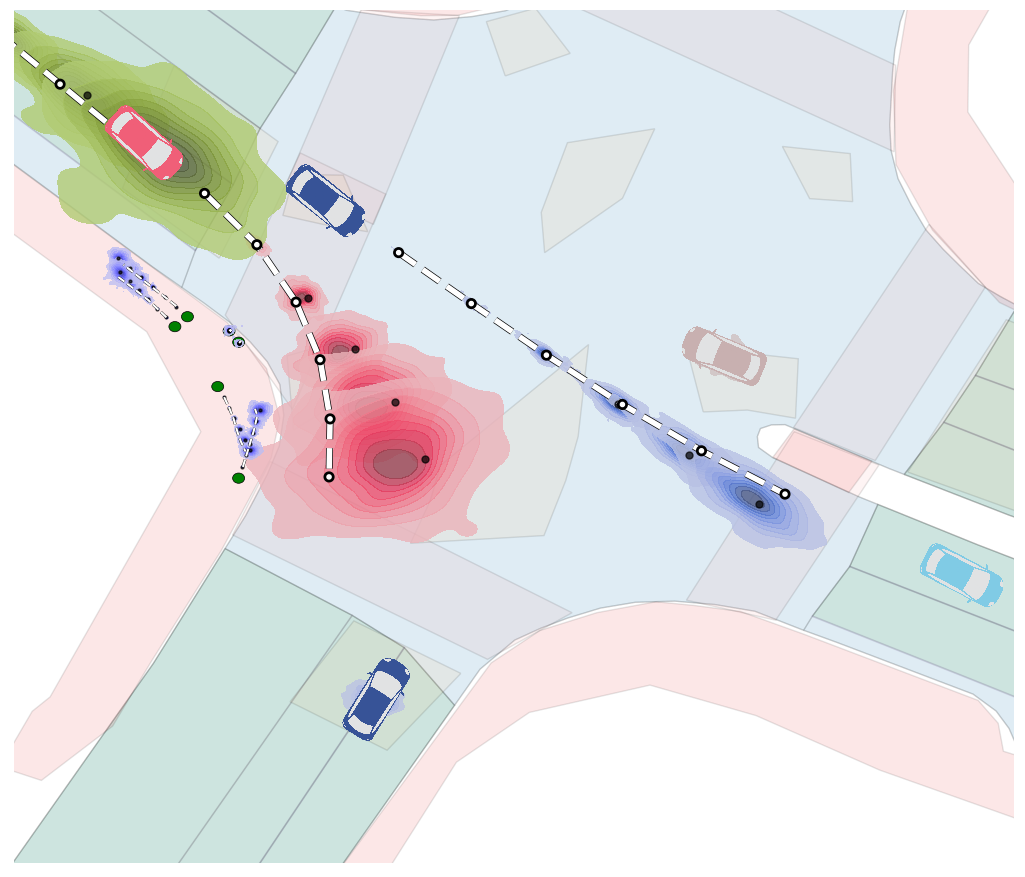

In [23]:
ph = 6
with torch.no_grad():
    timestep = np.array([2])
    predictions = eval_stg_nm.predict(scene,
                                   timestep,
                                   ph,
                                   num_samples=500)

    predictions_mm = eval_stg_nm.predict(scene,
                                      timestep,
                                      ph,
                                      num_samples=1,
                                      z_mode=True,
                                      gmm_mode=True)

    # Plot predicted timestep for random scene in map
    my_patch = (x_min, y_min, x_max, y_max)
    fig, ax = nusc_map.render_map_patch(my_patch, layers, figsize=(10, 10), alpha=0.1, render_egoposes_range=False)

    ax.plot([], [], 'ko-',
            zorder=620,
            markersize=4,
            linewidth=2, alpha=0.7, label='Ours (MM)')

    ax.plot([],
            [],
            'w--o', label='Ground Truth',
            linewidth=3,
            path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])

    plot_vehicle_nice(ax,
                      predictions,
                      scene.dt,
                      max_hl=10,
                      ph=ph,
                      map=None, x_min=x_min, y_min=y_min)

    plot_vehicle_mm(ax,
                    predictions_mm,
                    scene.dt,
                    max_hl=10,
                    ph=ph,
                    map=None, x_min=x_min, y_min=y_min)

    ax.set_ylim((1385, 1435))
    ax.set_xlim((850, 900))
    leg = ax.legend(loc='upper right', fontsize=20, frameon=True)
    ax.axis('off')
    for lh in leg.legendHandles:
        lh.set_alpha(.5)
    ax.get_legend().remove()
    fig.show()
    fig.savefig('plots/qual_nuScenes_no_map_pos.pdf', dpi=300, bbox_inches='tight')

## Prediction using velocity output

In [ ]:
model_dir = os.path.join(log_dir, 'vel_ee') 
eval_stg_vel, hyp = load_model(model_dir, eval_env, ts=12)


Loading from ./models/vel_ee/model_registrar-12.pt
Loaded!



/home/mingg/miniconda3/envs/torch1/lib/python3.9/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleDict' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/mingg/miniconda3/envs/torch1/lib/python3.9/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.rnn.LSTM' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/mingg/miniconda3/envs/torch1/lib/python3.9/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the orig

/home/mingg/miniconda3/envs/torch1/lib/python3.9/site-packages/torch/distributions/distribution.py:44: UserWarning: <class 'model.components.gmm2d.GMM2D'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +
/home/mingg/miniconda3/envs/torch1/lib/python3.9/site-packages/torch/distributions/distribution.py:44: UserWarning: <class 'model.components.gmm2d.GMM2D'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +
/home/mingg/miniconda3/envs/torch1/lib/python3.9/site-packages/torch/distributions/distribution.py:44: UserWarning: <class 'model.components.gmm2d.GMM2D'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize th

FileNotFoundError: [Errno 2] No such file or directory: 'plots/qual_nuScenes_no_map_vel.pdf'

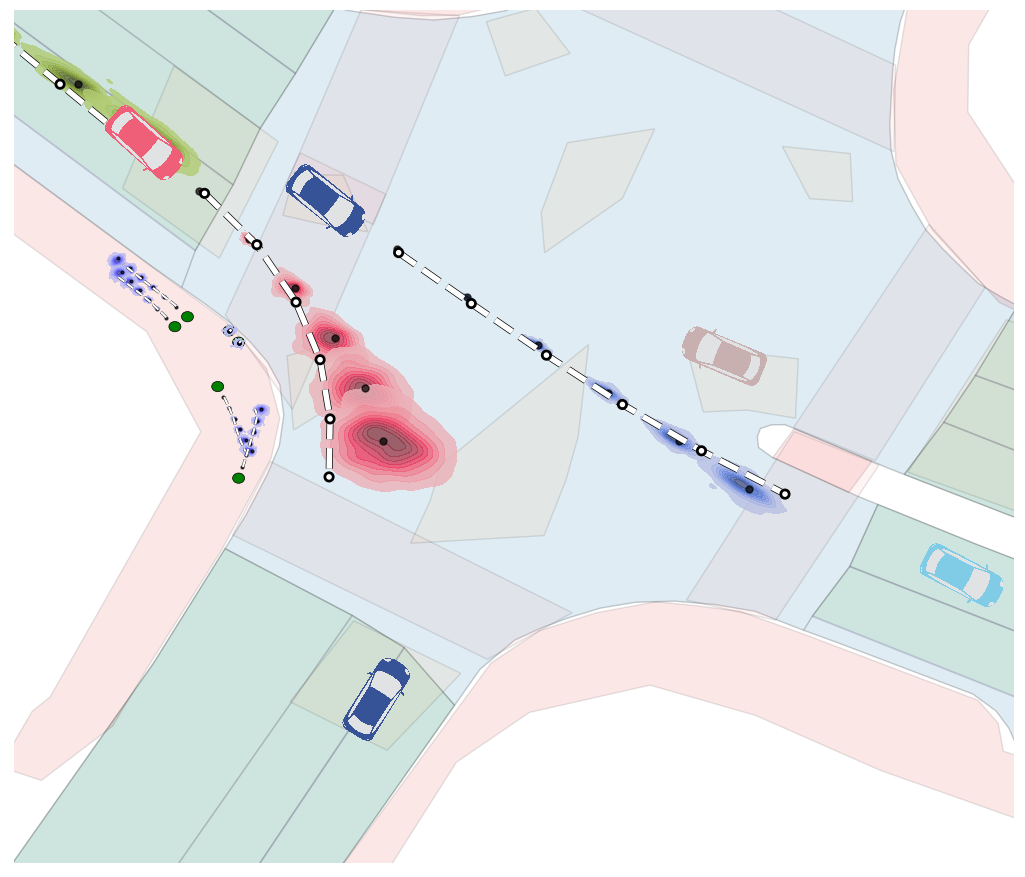

In [ ]:
ph = 6
with torch.no_grad():
    timestep = np.array([2])
    predictions = eval_stg_vel.predict(scene,
                                   timestep,
                                   ph,
                                   num_samples=500)

    predictions_mm = eval_stg_vel.predict(scene,
                                      timestep,
                                      ph,
                                      num_samples=1,
                                      z_mode=True,
                                      gmm_mode=True)

    # Plot predicted timestep for random scene in map
    my_patch = (x_min, y_min, x_max, y_max)
    fig, ax = nusc_map.render_map_patch(my_patch, layers, figsize=(10, 10), alpha=0.1, render_egoposes_range=False)

    ax.plot([], [], 'ko-',
            zorder=620,
            markersize=4,
            linewidth=2, alpha=0.7, label='Ours (MM)')

    ax.plot([],
            [],
            'w--o', label='Ground Truth',
            linewidth=3,
            path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])

    plot_vehicle_nice(ax,
                      predictions,
                      scene.dt,
                      max_hl=10,
                      ph=ph,
                      map=None, x_min=x_min, y_min=y_min)

    plot_vehicle_mm(ax,
                    predictions_mm,
                    scene.dt,
                    max_hl=10,
                    ph=ph,
                    map=None, x_min=x_min, y_min=y_min)

    ax.set_ylim((1385, 1435))
    ax.set_xlim((850, 900))
    leg = ax.legend(loc='upper right', fontsize=20, frameon=True)
    ax.axis('off')
    for lh in leg.legendHandles:
        lh.set_alpha(.5)
    ax.get_legend().remove()
    fig.show()
    fig.savefig('plots/qual_nuScenes_no_map_vel.pdf', dpi=300, bbox_inches='tight')

## Prediction using velocity output and map

In [ ]:
model_dir = os.path.join(log_dir, 'me_vel') 
eval_stg_vel_map, hyp = load_model(model_dir, eval_env, ts=12)


Loading from ./models/me_vel/model_registrar-12.pt
Loaded!



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


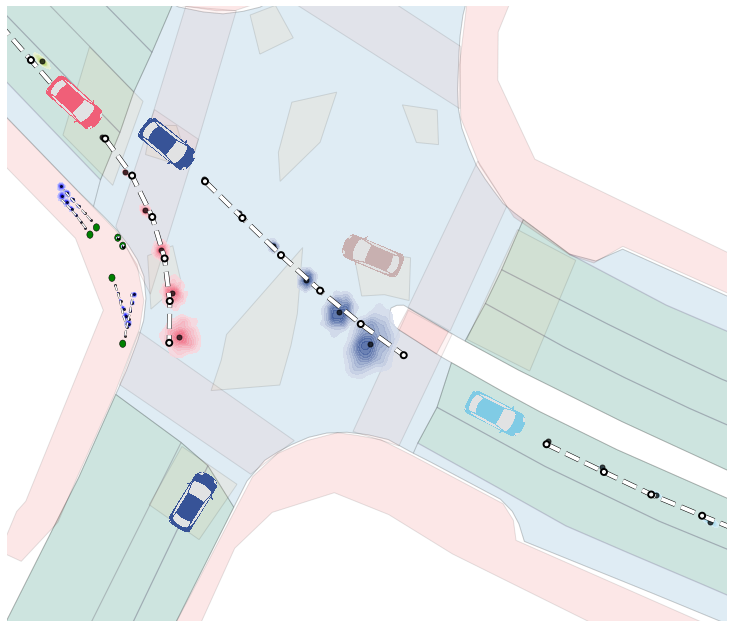

In [ ]:
ph = 6
with torch.no_grad():
    timestep = np.array([2])
    predictions = eval_stg_vel_map.predict(scene,
                                   timestep,
                                   ph,
                                   num_samples=500)

    predictions_mm = eval_stg_vel_map.predict(scene,
                                      timestep,
                                      ph,
                                      num_samples=1,
                                      z_mode=True,
                                      gmm_mode=True)

    # Plot predicted timestep for random scene in map
    my_patch = (x_min, y_min, x_max, y_max)
    fig, ax = nusc_map.render_map_patch(my_patch, layers, figsize=(10, 10), alpha=0.1, render_egoposes_range=False)

    ax.plot([], [], 'ko-',
            zorder=620,
            markersize=4,
            linewidth=2, alpha=0.7, label='Ours (MM)')

    ax.plot([],
            [],
            'w--o', label='Ground Truth',
            linewidth=3,
            path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])

    plot_vehicle_nice(ax,
                      predictions,
                      scene.dt,
                      max_hl=10,
                      ph=ph,
                      map=None, x_min=x_min, y_min=y_min)

    plot_vehicle_mm(ax,
                    predictions_mm,
                    scene.dt,
                    max_hl=10,
                    ph=ph,
                    map=None, x_min=x_min, y_min=y_min)

    ax.set_ylim((1385, 1435))
    ax.set_xlim((850, 900))
    leg = ax.legend(loc='upper right', fontsize=20, frameon=True)
    ax.axis('off')
    for lh in leg.legendHandles:
        lh.set_alpha(.5)
    ax.get_legend().remove()
    fig.show()
    fig.savefig('plots/qual_nuScenes_map_vel.pdf', dpi=300, bbox_inches='tight')

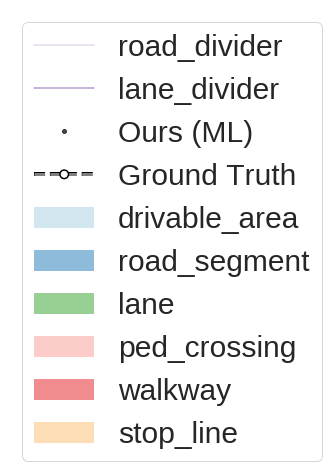

In [ ]:
my_patch = (0, 0, 1, 1)
fig, ax = nusc_map.render_map_patch(my_patch, layers, figsize=(1, 1), alpha=0.1, render_egoposes_range=False)
ax.plot([], [], 'ko',
            zorder=620,
            markersize=4,
            linewidth=2, alpha=0.7, label='Ours (ML)')

ax.plot([],
        [],
        'w--o', label='Ground Truth',
        linewidth=3,
        path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])
leg = ax.legend(loc='upper left', fontsize=30, frameon=True)
for lh in leg.legendHandles:
    lh.set_alpha(.5)
ax.axis('off')
ax.grid('off')
fig.savefig('plots/qual_nuScenes_legend.pdf', dpi=300, bbox_inches='tight')